In [177]:
import numpy as np
import matplotlib.pyplot as plt

# Creating Functions
Functions are isolated code blocks that can be executed at any point of your script. Functions are defined by their **name**, their **parameters** and their **return value**. The  function can then be called by using it’s name and providing the necessary parameters.  
Use the following syntaxe to define and call your function :

In [2]:

def function_name(param1, param2, param3=9):
    # ---- Your function code
    value = (param1 + param2 + param3) / 3
    # ---
    return value

mean = function_name(2, 4, 5)

Parameters can be of any type if not implied otherwise. They can also be given a default value by writing (_param = default_) . If not given a value when calling the function, this parameter will take its default value.  
Use functions either to do repetitive actions, or make your code more readable by separating and naming relevant code blocks.

# Task 1 : Learning Functions

Create a function that takes into account mass and velocity, checks if the mass is positive, and returns the kinetic energy. Recall : $E_{kin}=\frac{1}{2}mv^2$.
Call this function for different values.


In [178]:
def kinetic_energy(veloc, mass):
    if mass<0:
        print("Error, mass cannot be negative.")
        return 0
    else:
        energy = mass * veloc**2 /2 
        return energy

energy1 = kinetic_energy(0.5, 2)
energy2 = kinetic_energy(0.5, 4)
energy3 = kinetic_energy(1, 4)
print( "Kinetic energy = ", energy1, "J" )

Kinetic energy =  0.25 J


- Consider a satellite of mass m  orbiting the earth at a distance r. Create a function that takes the distance from earth and returns their orbit speed (considering circular orbit). Recall $v=\sqrt{\frac{GM}{r}}$, where  M is the mass of the earth and G the gravitational constant. Set G and M as parmeters of your function with default values.  
What is the orbit speed of the ISS ? How would that speed change if the gravitationnal constant was doubled ? And if the ISS was 1 km higher ?    
  
$G=\ 6.67430\times{10}^{-11}\frac{Nm^2}{kg^2}$,  
$M_{earth}=5.97\times{10}^{24}\ kg$,  
$r_{ISS}=6.78\times{10}^6\ m$

In [179]:
def orbit_speed(distance, G=6.674e-11, M=5.97e24):

    if M<0 or distance<0:
        print("Error, mass cannot be negative.")
        return 0
    else:
        speed = np.sqrt(G * M / distance)
        return speed

speed = orbit_speed(6.78e6)
print("Speed of ISS : ", speed, "m/s")

speed2 = orbit_speed(6.78e6, G = 2*6.674e-11)
print("With double G: ", speed2, "m/s")

speed3 = orbit_speed(6.78e6 + 1e3)
print("1km higher: ", speed3, "m/s")

speed3 = orbit_speed(7)
print("1km higher: ", speed3, "m/s")


Speed of ISS :  7665.940070737678 m/s
With double G:  10841.276416376588 m/s
1km higher:  7665.374798453553 m/s
1km higher:  7544513.616813593 m/s


# Task 2 : 

Using special observations techniques, you were able to observe the velocity of a sample of space debris in the Earth’s close orbit.  
Generate a sample of N=100 velocities following a gaussian distribution  $\mathcal{N}(7500\ km,\ \ (250\ km)²)$.

In [199]:
# np.random.normal?
N = 100
velocities = np.random.normal(7.5, 0.1, size=(N,))


Create a function to relate a single velocity to the altitude (take into account the Earth’s radius and beware dimensions). Call this function on the first element of the velocity list.

In [200]:
def altitude(velocity, earth_radius = 6.371e6, earth_mass=5.97e24, G=6.674e-11):
    distance_from_center = G * earth_mass / (velocity*1e3)**2 
    print(distance_from_center)
    alt = distance_from_center - earth_radius
    return alt/1e3      # Convert back to km

print( "Altitude of first debris is : ", altitude(velocities[0]) , "km")

6685032.77197194
Altitude of first debris is :  314.03277197194006 km


Call this function, but pass the entire array of velocities instead of a single one. What do you see ? What is the difference between giving the function a velocity or an array of velocities ?

In [201]:
altitudes = altitude(velocities)

[6685032.77197194 7014936.62318885 7287634.54536082 7029870.00683958
 6933131.35161395 7034069.38005212 7308806.77458709 6948716.07279155
 7095415.3485695  7121325.22555693 7373475.06373774 7099926.25172349
 7244187.51199377 7254082.94881799 7282519.94545576 7288387.53493955
 7052818.86500746 7134053.77099271 7103377.01393672 7125943.56387579
 7214217.55125615 7159957.5788424  6845894.05741876 7048898.4158007
 7094941.03623952 7241200.99785405 6951499.22988876 7201704.4173975
 7029957.78843853 7234875.8676882  7210675.03322922 6981953.30823556
 7009833.6480171  6822663.20028519 6936460.95137148 6786710.17656448
 6666182.9664205  6812573.4161364  7128322.11032456 6979608.0700996
 7176039.14433666 6626814.82740359 6785648.03102594 7220143.47885885
 7063160.64702395 7143187.28203958 7263465.3711183  6610826.92411205
 7304154.99919873 6995771.61265971 7137818.00575234 6999117.66156539
 7249358.60416491 6988227.99749734 7709356.65193923 6969293.85345392
 6648762.88805842 6926873.49773708 73

You are now leading a small EPFL startup that plans on cleaning the Earth’s orbit. With your current ressources, you can only go to 500km altitude.  
Create a functions that takes an altitude from the previous step and returns either the unchanged value if you can reach this debris, or a NaN if not ( $np.nan$ ).  
Call this function with your array of altitudes. What do you see ? Is this expected ?


In [202]:
def reachable_orbit(orbit, max_orbit = 500):
    if orbit > max_orbit:
        return np.nan
    else: return orbit

print(reachable_orbit(200) )
print(reachable_orbit(600) )

# orbits = reachable_orbit(altitudes)

200
nan


The $np.vectorize(myfunc)$ function return your function transformed into an element wise function, that is to say calling your function with an array now applies the function on every point of your array.  
Vectorize your last function and try again. What do you see ?


In [203]:
reachable_orbit = np.vectorize( reachable_orbit )

orbits = reachable_orbit(altitudes)

To take the mean and std of an array while ignoring the NaNs, use np.nanmean() and np.nanstd().  
What is the mean and standard deviation of the reachable debris ?


355.93549887952014
76.49757388268638


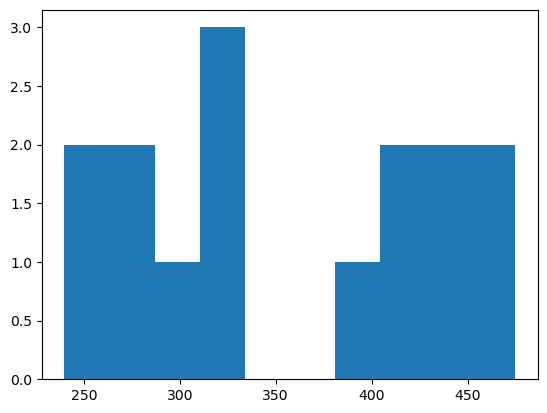

In [204]:
print( np.nanmean(orbits) )
print( np.nanstd(orbits) )
plt.hist(orbits)
plt.show()

In [208]:
M = 1000
velocities_matrix = np.random.normal(7.5, 0.1, size=(N,M))
altitudes_matrix = altitude(velocities_matrix)
orbits_matrix = reachable_orbit(altitudes_matrix)

print( np.nanmean(orbits_matrix, axis=1) )
print( np.nanstd(orbits_matrix, axis=1) )

[[7021468.56837552 7196247.67526521 6710626.60055832 ... 6753064.66315237
  6891896.56565875 6838457.13866017]
 [7159217.6734874  7428595.85031187 6763512.27553314 ... 7069082.53187315
  7251928.38171463 6777244.0351272 ]
 [6991436.6250756  7180389.95496838 7095922.23656412 ... 6835370.8159339
  7565659.27865096 6969801.43172124]
 ...
 [7170394.53943318 7055326.91907689 6552836.09813161 ... 7100022.16809039
  7360555.1302342  7149013.18279149]
 [7237345.07824633 7334008.62796386 7036092.35390054 ... 7031468.34209024
  6873010.29184078 7145858.45853393]
 [7174022.14690105 7110289.75603832 6905585.4732266  ... 7251888.6407422
  7304867.87937238 7238711.68279453]]
[413.05294002 411.46350344 416.94939786 417.10060212 408.95711467
 407.22815252 419.21437057 411.32708932 396.64404236 416.73462869
 414.92361526 418.64309375 411.90249733 418.91291496 410.70692351
 407.73617949 417.93719122 416.92276519 422.84890434 420.3001004
 410.58260832 411.69009269 410.13742525 403.86572259 414.31997656
 